# Laboratory Exam

**Dataset**

The dataset I've used is the FaceBook Metrics from UCI.

> Download the dataset using ucimlrepo package which is from UCI itself

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
data = fetch_ucirepo(id=368) 

# Dataset in Pandas dataframe
data_df = data.data.original
data_df = data_df[['comment', 'like', 'share', 'Lifetime Post Total Reach', 'Lifetime Engaged Users', 'Lifetime Post Consumers', 'Total Interactions']]
data_df.head()

,comment,like,share,Lifetime Post Total Reach,Lifetime Engaged Users,Lifetime Post Consumers,Total Interactions
0,4,79.0,17.0,2752,178,109,100
1,5,130.0,29.0,10460,1457,1361,164
2,0,66.0,14.0,2413,177,113,80
3,58,1572.0,147.0,50128,2211,790,1777
4,19,325.0,49.0,7244,671,410,393


> Inspect data distribution

In [3]:
import seaborn as sns

<Axes: xlabel='Total Interactions', ylabel='Count'>

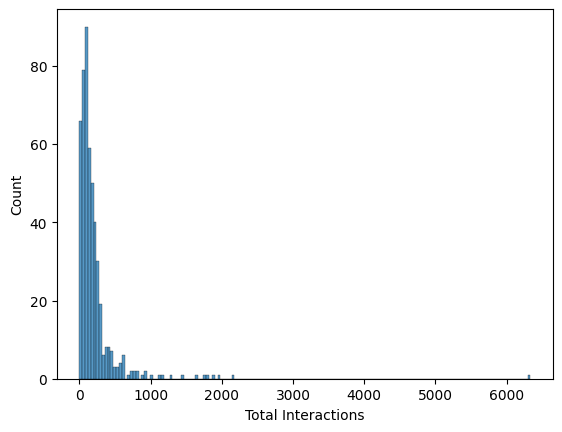

In [4]:
sns.histplot(data_df['Total Interactions'])

The distribution of the points in the feature attribute is skewed to the right. Most values fall below 500. Let's remove the outliers

In [5]:
data_df = data_df.loc[data_df['Total Interactions'] <= 500]
data_df.shape

(464, 7)

> Create a pairplot to check if the other attributes have a correlation with the target

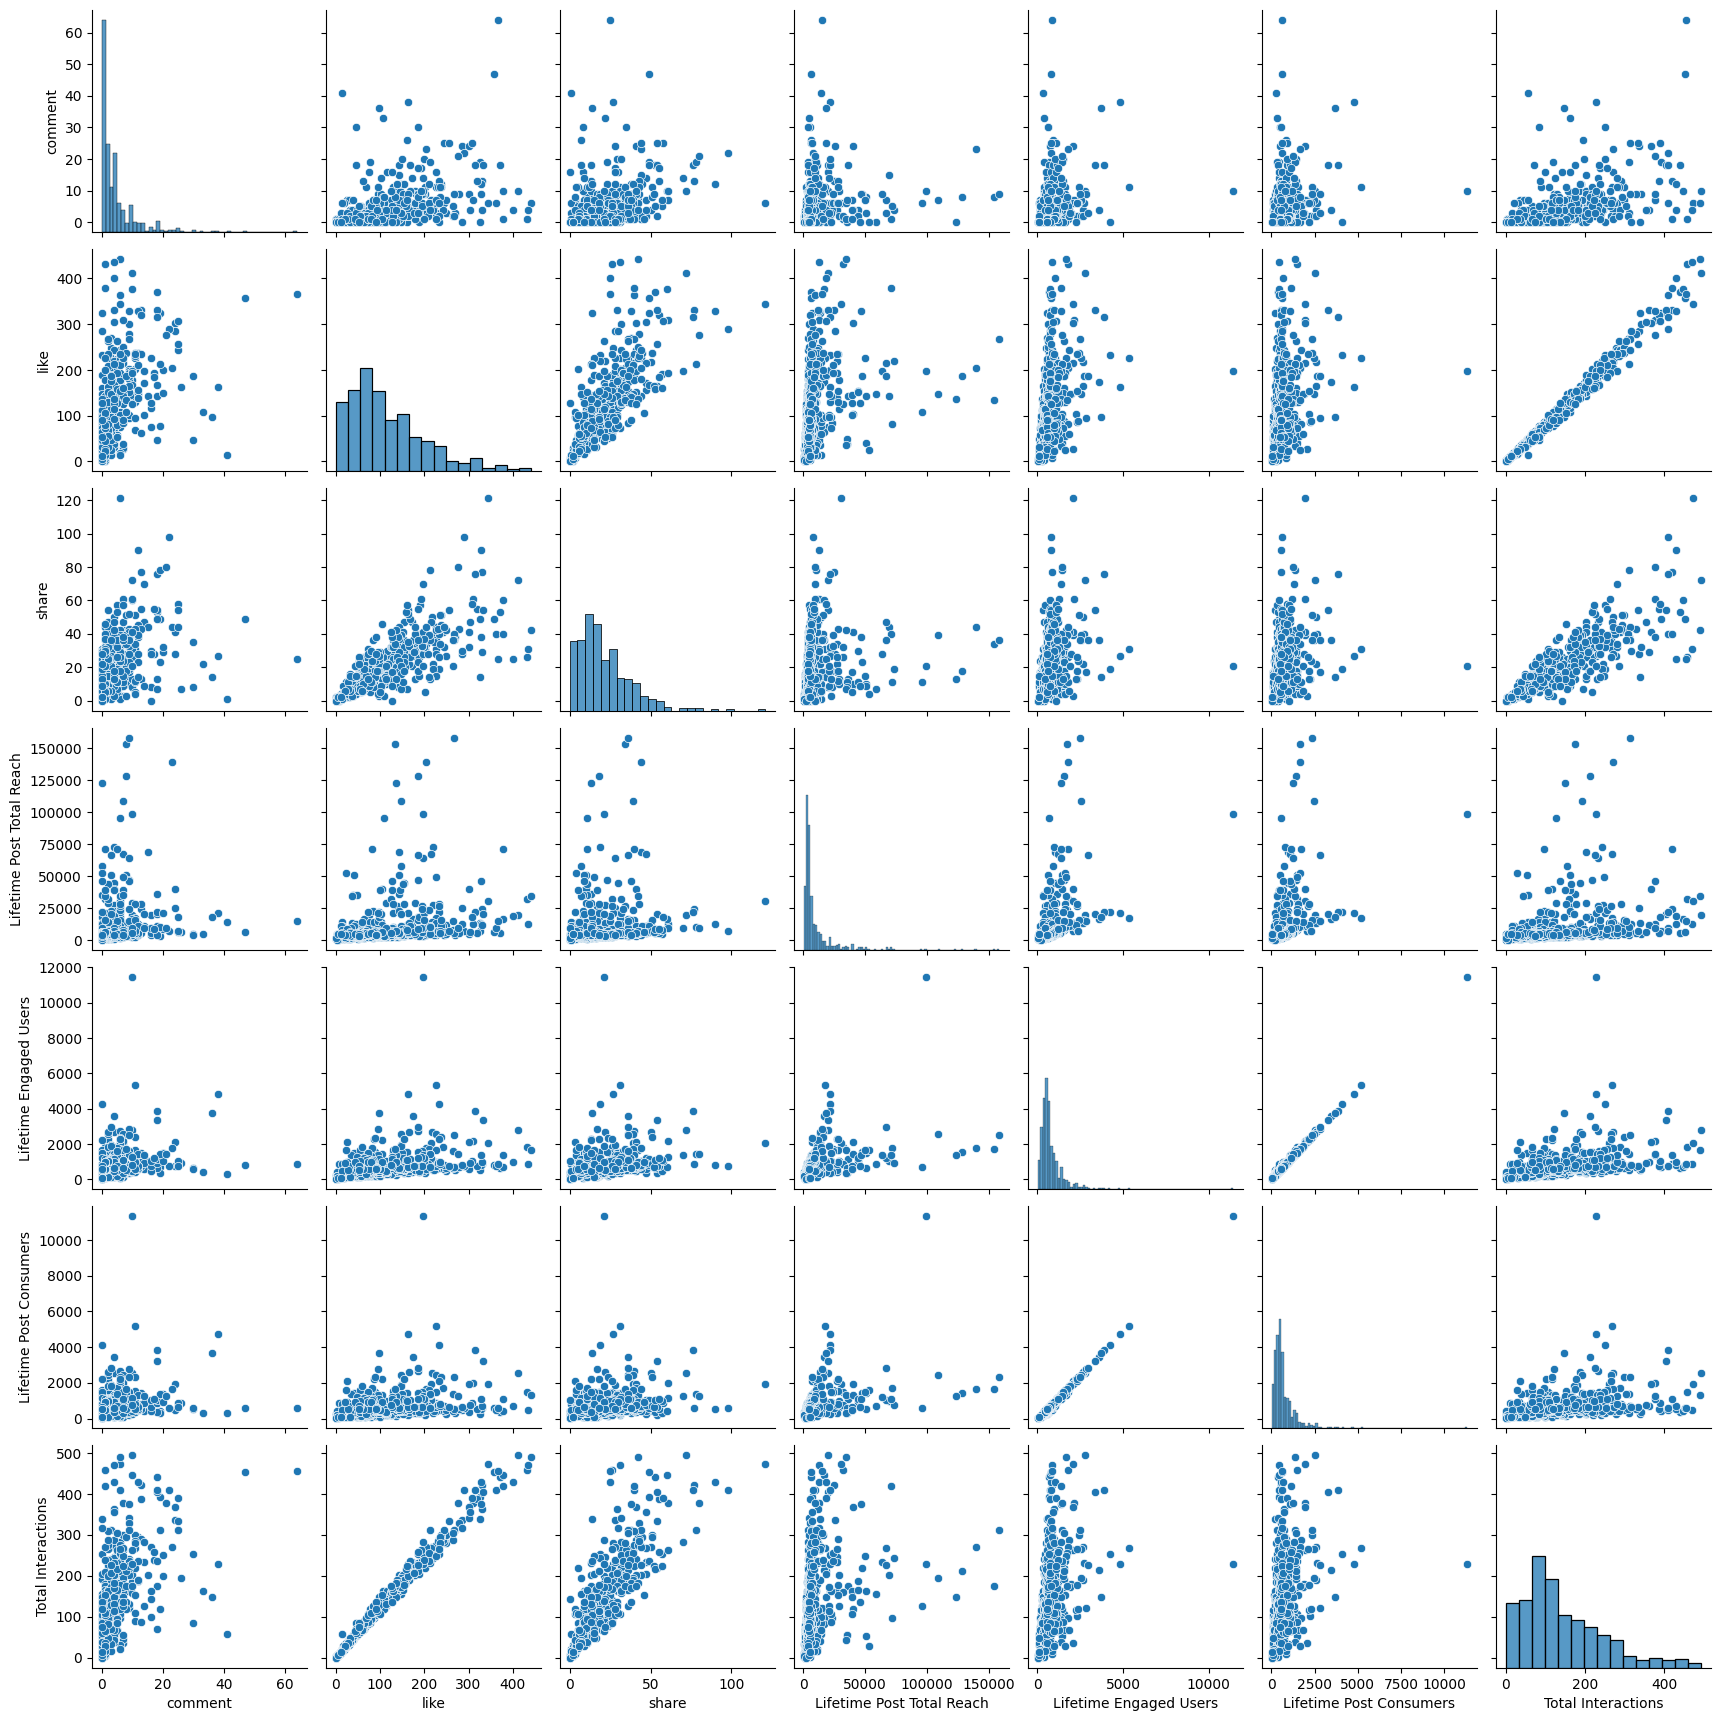

In [6]:
sns.pairplot(data_df)

> Only `like` and `share` seem to have real influence to the the `Total Interactions` dependent feature. The other attributes seem to have no or very little relation to the Y.

## Model
- X = [like, share]
- y = Total Interaction

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error
import matplotlib.pyplot as plt

In [8]:
data_df.dropna(subset=['like', 'share', 'Total Interactions'], how='any', inplace=True)

In [9]:
train, test = train_test_split(data_df, test_size=0.2, random_state=42)

> x = like

>  y = Total Intereactions

In [10]:
# Model 1 - like x interaction
model_1 = LinearRegression()
train_1_x = train[['like']]
train_1_y = train['Total Interactions']
model_1.fit(X = train_1_x,y = train_1_y)

# Prediction
test_y = test['Total Interactions']
test_1_x = test[['like']]
prediction_y_1 = model_1.predict(test_1_x)

# Evaluation
like_r2_score = r2_score(test_y, prediction_y_1)
like_mse_score = mean_squared_error(test_y, prediction_y_1)
like_rmse_score = root_mean_squared_error(test_y, prediction_y_1)
print("R-squared (R^2) Score:", like_r2_score)
print("Mean Squared Error (MSE):", like_mse_score)
print("Root Mean Absolute Error: ", like_rmse_score)

R-squared (R^2) Score: 0.9813108547596505
Mean Squared Error (MSE): 154.42142077229047
Root Mean Absolute Error:  12.426641572536422


Text(0, 0.5, 'Total Interactions')

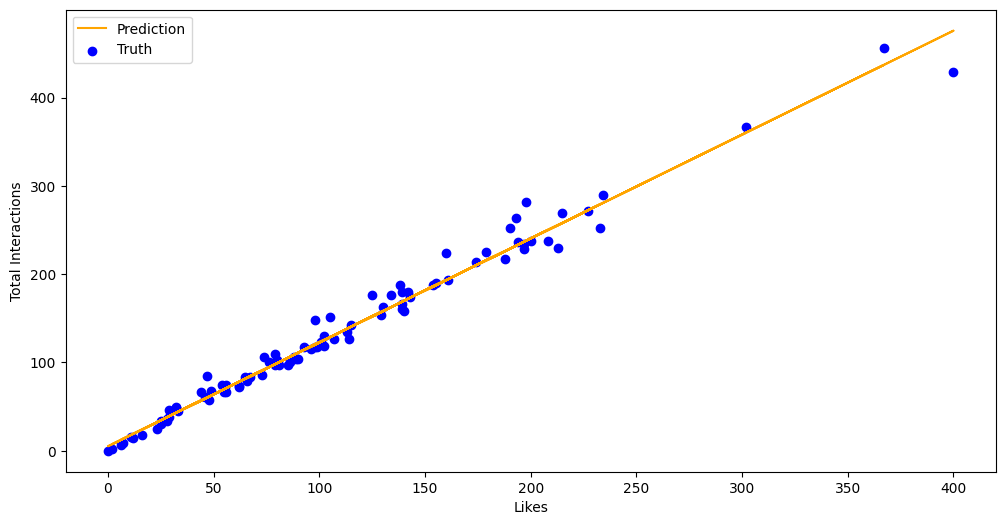

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(test_1_x, prediction_y_1, color='orange', label='Prediction')
plt.scatter(test_1_x, test_y, color='blue',label='Truth')
plt.legend()
plt.xlabel('Likes')
plt.ylabel('Total Interactions')

In [12]:
# Model 2 - share x interaction
model_2 = LinearRegression()
train_2_x = train[['share']]
train_2_y = train['Total Interactions']
model_2.fit(X = train_2_x, y = train_2_y)

# Prediction
test_y = test['Total Interactions']
test_2_x = test[['share']]
prediction_y_2 = model_2.predict(test_2_x)

# Evaluation
share_r2_score = r2_score(test_y, prediction_y_2)
share_mse_score = mean_squared_error(test_y, prediction_y_2)
share_rmse_score = root_mean_squared_error(test_y, prediction_y_2)
print("R-squared (R^2) Score:", share_r2_score)
print("Mean Squared Error (MSE):", share_mse_score)
print("Root Mean Absolute Error: ", share_rmse_score)

R-squared (R^2) Score: 0.5030888178391895
Mean Squared Error (MSE): 4105.791343589348
Root Mean Absolute Error:  64.0764492117763


Text(0, 0.5, 'Total Interactions')

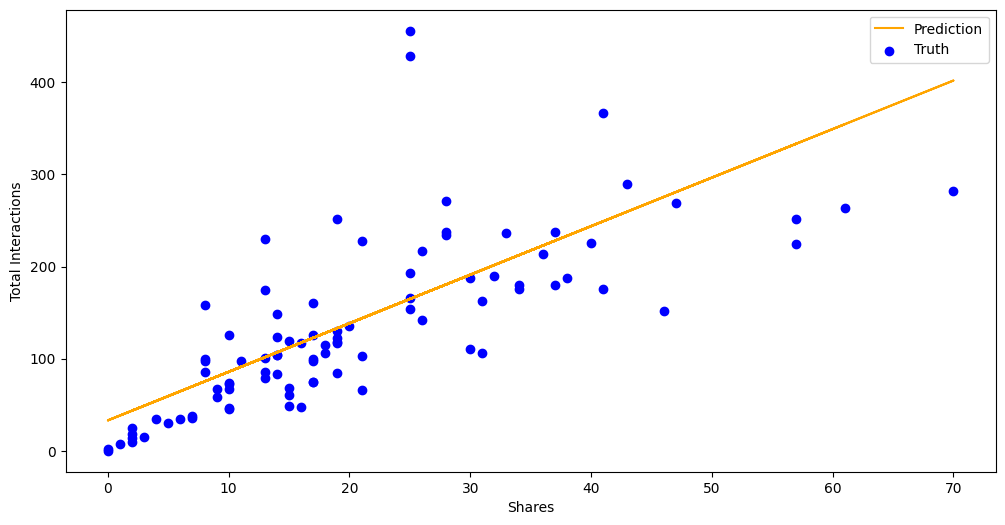

In [13]:
import matplotlib.pyplot as plt
 
plt.figure(figsize=(12, 6))
plt.plot(test_2_x, prediction_y_2, color='orange', label='Prediction')
plt.scatter(test_2_x, test_y, color='blue',label='Truth')
plt.legend()
plt.xlabel('Shares')
plt.ylabel('Total Interactions')